# Framingham heart Study

## Data Importing and Preprocessing

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# data import

df = pd.read_csv("framingham.csv")
df.head(3)

,Male,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Male             3658 non-null   int64  
 1   Age              3658 non-null   int64  
 2   Education        3658 non-null   object 
 3   CurrentSmoker    3658 non-null   int64  
 4   CigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   PrevalentStroke  3658 non-null   int64  
 7   PrevalentHyp     3658 non-null   int64  
 8   Diabetes         3658 non-null   int64  
 9   TotChol          3658 non-null   int64  
 10  SysBP            3658 non-null   float64
 11  DiaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  HeartRate        3658 non-null   int64  
 14  Glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


In [4]:
df.describe()

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
missing_values = df.isnull().sum()
missing_values

Male               0
Age                0
Education          0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [6]:
duplicates = df.duplicated().sum()
duplicates

0

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.head(3)

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,0,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,0,1


In [9]:
# Define the binary columns that should not be changed
binary_columns = ['Male', 'CurrentSmoker', 'BPMeds', 'PrevalentStroke', 'PrevalentHyp', 'Diabetes', 'TenYearCHD','Education_High school/GED','Education_Some college/vocational school','Education_Some high school']

# Exclude binary columns from the scaling process
continuous_columns = df.columns.difference(binary_columns)

# Standardize only the continuous columns
df[continuous_columns] = (df[continuous_columns] - df[continuous_columns].mean()) / df[continuous_columns].std()

# df now has standardized continuous columns and unchanged binary columns
df

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
0,1,-1.232411,0,-0.757065,0,0,0,0,-0.948978,-1.193947,-1.078733,0.292010,0.356321,-0.203016,0,0,0,0
1,0,-0.414848,0,-0.757065,0,0,0,0,0.298253,-0.514811,-0.160096,0.724911,1.608249,-0.244850,0,1,0,0
2,1,-0.181259,1,0.920563,0,0,0,0,0.184868,-0.220518,-0.243609,-0.108914,-0.060988,-0.495852,0,0,0,1
3,0,1.337073,1,1.759377,0,0,1,0,-0.268670,0.798187,1.009079,0.688016,-0.895606,0.884661,1,0,1,0
4,0,-0.414848,1,1.172207,0,0,0,0,1.091946,-0.107329,0.090441,-0.659878,0.773630,0.131654,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,0.052331,1,-0.673184,0,0,1,0,1.726900,2.111184,0.758541,0.046044,-0.812144,0.173488,1,0,0,1
3654,1,0.169126,1,2.849836,0,0,0,0,-0.676855,-0.265794,-0.243609,-1.493704,-0.895606,-0.579519,0,0,1,0
3655,0,0.285920,0,-0.757065,0,0,0,0,0.729115,0.051136,0.006929,-1.060803,0.356321,1.051996,0,1,0,0
3656,1,-1.115616,0,-0.757065,0,0,1,0,-1.175747,0.390705,1.259616,-0.044963,-0.728682,-0.412184,0,0,1,0


### Splitting the data

In [10]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=21)

print(y_train.mean())
print(y_test.mean())

0.15234375
0.15209471766848817


In [11]:
clf = LogisticRegression(random_state=0, penalty='none', max_iter=1000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.5448233   0.53828351  0.34368633  0.15497598 -0.12199588  0.97903599
   0.30076012  0.08081888  0.11060481  0.36200018 -0.02476796 -0.01664497
  -0.09599582  0.16912942 -0.09313108 -0.04775272  0.1846442 ]]
[-2.5833884]


/Users/hyoju/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [12]:
y_pred = clf.predict_proba(X_test)[:,1]

In [13]:
roc_auc_score(y_test,y_pred)

0.7147552371090259

#### Logistic Regression with L1-regularization (Lasso)

In [14]:
reg_l1 = LogisticRegressionCV(penalty='l1', Cs=[1, 10, 100], cv=5, solver='liblinear',random_state = 21)
reg_l1.fit(X_train, y_train)
y_pred_reg_l1 = reg_l1.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_reg_l1)

0.7170449648501065

#### Logistic Regression with L2-regularization (Ridge)

In [15]:
reg_l2 = LogisticRegressionCV(penalty='l2', Cs=[1, 10, 100], cv=5, solver='liblinear')
reg_l2.fit(X_train, y_train)
y_pred_reg_l2 = reg_l2.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_reg_l2)

0.7149932144304302

#### Decision Tree

In [25]:
Dec = DecisionTreeClassifier(max_depth=3)
Dec.fit(X_train,y_train)
y_pred = Dec.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.6631495333714954

In [26]:
# Decision Tree WITHOUT 5-fold cross validation

Dec = DecisionTreeClassifier(random_state = 21)
Dec.fit(X_train,y_train)

y_pred = Dec.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.550251805733324

In [28]:
simple_tree = DecisionTreeClassifier(max_depth=3)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

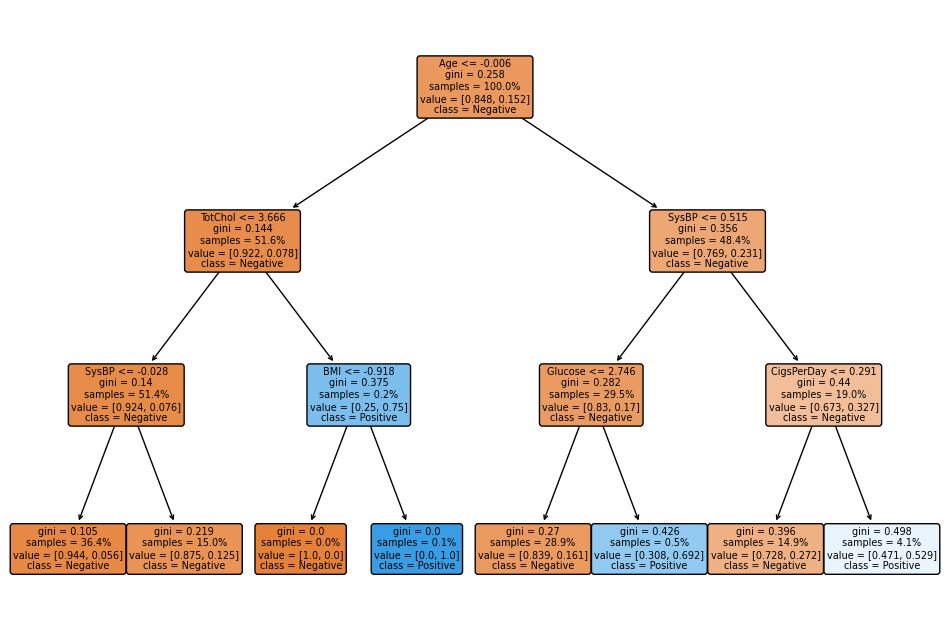

In [29]:
# (a) Visual depiction of the tree
plt.figure(figsize=(12, 8))
plot_tree(simple_tree, 
          filled=True, 
          feature_names=list(X_train.columns), 
          class_names=['Negative', 'Positive'], 
          rounded=True, 
          proportion=True)
plt.show()

In [30]:
# (b) Its out-of-sample AUC
y_pred_test = simple_tree.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_test)
print(f"Out-of-sample AUC: {test_auc}")

Out-of-sample AUC: 0.6631495333714954


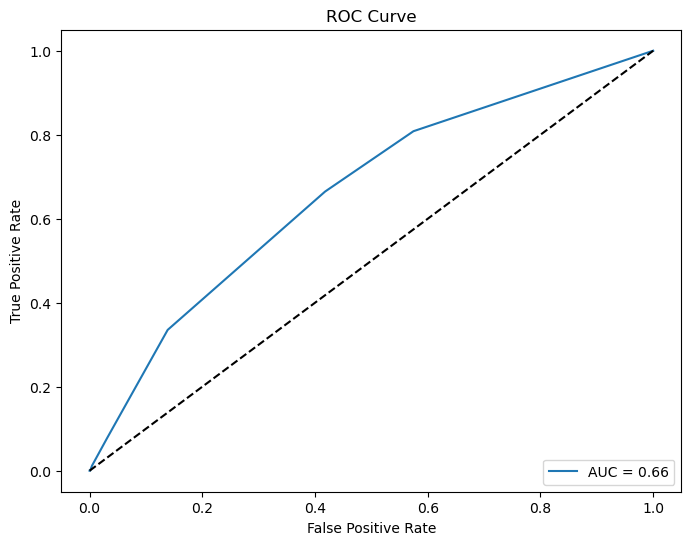

In [31]:
# (c) Its out-of-sample ROC plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# (d) The highest achievable True Positive Rate with True Negative Rate at least 60%
# True Negative Rate is 1 - False Positive Rate

required_tnr = 0.60
required_fpr = 1 - required_tnr

# Initialize variables to store the best TPR and its corresponding FPR
best_tpr = 0
for i, fpr_value in enumerate(fpr):
    if fpr_value <= required_fpr and tpr[i] > best_tpr:
        best_tpr = tpr[i]
        closest_index = i

highest_tpr_with_required_tnr = best_tpr
print(f"The highest achievable TPR with a TNR of at least 60%: {highest_tpr_with_required_tnr}")

The highest achievable TPR with a TNR of at least 60%: 0.33532934131736525
